In [1]:
#Melakukakan pembacaan data set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ri=pd.read_csv('police.csv')
print(ri.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [2]:
ri.state.value_counts()


RI    91741
Name: state, dtype: int64

In [3]:
# semua data berisi data pada rhode island state dan negara amerika maka kolom ini dapat dibuang
ri.drop(['county_name','state'], axis='columns', inplace=True)

In [4]:
# buat index menjadi tipe datetime dengan menggabungkan kolom 'stop_date' dan 'stop_time'
combined=ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)

# buat 'date_and_time' menjadi index
ri.set_index('date_and_time', inplace=True)
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_and_time', length=91741, freq=None)

In [5]:
# kita baung kolom 'stop_date', 'stop_time'
ri.drop(['stop_date', 'stop_time'], axis=1, inplace=True)

In [6]:
# pada analisa pertama kita ingin melihat apakah ada hubungan antara 
# tinkat pemeriksaan polisi dengan gender pengemudi 
# maka semua data yang null di kolom driver_gender akan di buang
ri.dropna(subset=['driver_gender'], inplace=True)

In [7]:
#data sudah mualai rapi
ri.head()


,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [8]:
#perbaiki type data yang mungkin salah
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 11 columns):
driver_gender         86536 non-null object
driver_race           86536 non-null object
violation_raw         86536 non-null object
violation             86536 non-null object
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null object
is_arrested           86536 non-null object
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null object
dtypes: bool(2), object(9)
memory usage: 6.8+ MB


In [9]:
# kolom driver_gender yang bertype object lebih baik kita rubah ke tipe category
ri['driver_gender'] = ri.driver_gender.astype('category')
# kolom is_arrested dirubah ke tipe boolean
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 11 columns):
driver_gender         86536 non-null category
driver_race           86536 non-null object
violation_raw         86536 non-null object
violation             86536 non-null object
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null object
is_arrested           86536 non-null bool
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null object
dtypes: bool(3), category(1), object(7)
memory usage: 5.6+ MB


In [10]:
# kita mualai dengan melihat persentase pelanggara pria dan 
ri.groupby('driver_gender').violation.value_counts(normalize=True)


driver_gender  violation          
F              Speeding               0.658114
               Moving violation       0.138218
               Equipment              0.105199
               Registration/plates    0.044418
               Other                  0.029738
               Seat belt              0.024312
M              Speeding               0.522243
               Moving violation       0.206144
               Equipment              0.134158
               Other                  0.058985
               Registration/plates    0.042175
               Seat belt              0.036296
Name: violation, dtype: float64

Sebagian besar pelanggaran yang dilakukan oleh kedua gender adalah speeding atau mengebut, kita akan perikas kolom kasus ini lebih mendalam

In [11]:
# dari semua pemeriksaan yang dilakukan oleh polisi tidak langsung terjadi penangkapan
# kita lihat rata-rata nya

print(ri.is_arrested.mean()*100)

3.55690117407784


ternya hanya 3.5% saja yang berujung penangkapan

Text(0, 0.5, 'Persentase penangkapan')

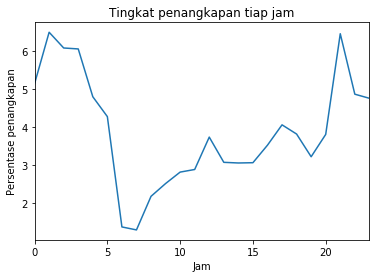

In [12]:
# kita akan lihat pada jam berapa paling sering terjadi penagkapan
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()*100
hourly_arrest_rate.plot()
plt.title('Tingkat penangkapan tiap jam')
plt.xlabel('Jam')
plt.ylabel('Persentase penangkapan')

BISA DILIHAT JELAS JIKA PENANGKAPAN LEBIH SERING TERJADI DI MALAM HARI DARI PUKUL 20.00 SAMPAI 4.00 PAGI

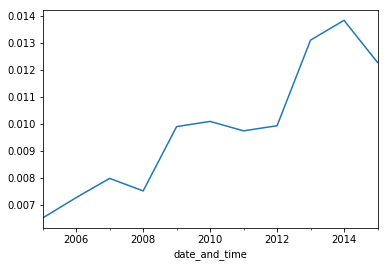

In [13]:
# berikutnya kita akan analisa tingkat penangkapan yang berhubungan dengan
# obat obatan terlarang
annual_drug_rate = ri.resample('A').drugs_related_stop.mean()
annual_drug_rate.plot()
plt.show()

Dapat dilihat bahwa penangkapan yang berkaitan dengan obat-obatan terus meningkat dengan drastis, 
namun hal ini bisa jadi terjadi bukan karena peredaran obat-obatan semakin parah tiap tahunya di amerika, bisa saja ini terjadi karena jumlah operasi pemeriksaan yang maningkat

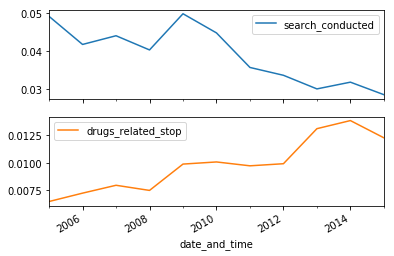

In [14]:
# kita bandingkan dengan data pemeriksaan polisi tiap tahun
annual_search_rate = ri.resample('A').search_conducted.mean()

annual = pd.concat([annual_search_rate, annual_drug_rate], axis=1)
annual.plot(subplots=True)
plt.show()

Bisa dilihat jika ternyata operasi pemesiksaan yang dilakukan polisi malah semakin menurun, hasil ini mendukung bahwa memang penggunaan obat-obatan terlarang semakin meningkat di amerika

Penghitungan pelanggaran per Distrik

Negara bagian Rhode Island dipecah menjadi enam distrik kepolisian, juga dikenal sebagai zona. Bagaimana perbandingan pelanggaran lalu lintas pada zona-zona ini?

In [15]:
#buat tabel cross tab antara violation dan district
all_zone = pd.crosstab(ri.district, ri.violation)
all_zone

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [16]:
#kita akan periksa bagian zona k dulu
k_zone = all_district.loc['Zone K1':'Zone K3']
#kita buat barplot unuk membandingkan categorical data
k_zone.plot(kind='bar', stacked=True)
plt.show()

NameError: name 'all_district' is not defined

dapat dilihat jelas jika pelanggaran paling tinggi terjadi di zone K3, akan tatepi janis pelanggaran untuk semua zona K memimiliki parbandingan yang serupa